In [ ]:
import pandas as pd

# Load the dataset using a relative path - assuming the file is in the same directory as the notebook
df = pd.read_csv('/content/spotify-2023.csv', encoding='latin-1')

# Display the first few rows of the dataset with styling
df.head().style.set_table_styles([
    {'selector': 'table', 'props': [('border', '1px solid black')]},
    {'selector': 'th', 'props': [('background-color', 'purple'), ('color', 'white'), ('border')]},
    {'selector': 'td', 'props': [('background-color', 'lime'), ('color', 'black'), ('border', '1px solid black')]},
])

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


How many rows and columns does the dataset contain?

In [ ]:
import pandas as pd
from colorama import Fore, Back, Style

# Load the dataset
df = pd.read_csv('/content/spotify-2023.csv', encoding='latin-1')

# Get the number of rows and columns
num_rows = df.shape[0]
num_cols = df.shape[1]

# Print the results with boxing, colors, and bold text
print(Fore.BLUE + Back.WHITE + Style.BRIGHT + '+-----------------------+')
print(Fore.BLUE + Back.WHITE + Style.BRIGHT + '| Number of rows: ' + str(num_rows) + '   |')
print(Fore.BLUE + Back.WHITE + Style.BRIGHT + '| Number of cols: ' + str(num_cols) + '    |')
print(Fore.BLUE + Back.WHITE + Style.BRIGHT + '+-----------------------+' + Style.RESET_ALL)

+-----------------------+
| Number of rows: 953   |
| Number of cols: 24    |
+-----------------------+


What are the data types of each column? Are there any missing values?

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('/content/spotify-2023.csv', encoding='latin-1')

# Display the data types of each column with styling
df.dtypes.to_frame().style.set_table_styles([
    {'selector': 'table', 'props': [('border', '1px solid black')]},
    {'selector': 'th', 'props': [('background-color', 'red'), ('color', 'white'), ('border', '1px solid black')]},
    {'selector': 'td', 'props': [('background-color', 'gold'), ('color', 'black'), ('border', '1px solid black')]},
])

# Display the missing values with styling
def bold_missing(v, props=''):
    return np.where(v > 0, props, '')

df.isnull().sum().to_frame().style.apply(bold_missing, props='font-weight: bold', axis=0).set_table_styles([
    {'selector': 'table', 'props': [('border', '1px solid black')]},
    {'selector': 'th', 'props': [('background-color', 'red'), ('color', 'white'), ('border', '1px solid black')]},
    {'selector': 'td', 'props': [('background-color', 'gold'), ('color', 'black'), ('border', '1px solid black')]},
])

,0
track_name,0
artist(s)_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,0
in_apple_playlists,0


**in_shazam_charts	50**

**key	95**

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/spotify-2023.csv', encoding='latin-1')

# Convert the 'streams' column to numeric, handling errors
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Calculate the mean, median, and standard deviation of the 'streams' column
streams_stats = df['streams'].agg(['mean', 'median', 'std'])

# Display the results with styling
streams_stats.to_frame().style.set_table_styles([
    {'selector': 'table', 'props': [('border', '1px solid black')]},
    {'selector': 'th', 'props': [('background-color', 'blue'), ('color', 'white'), ('border', '1px solid black')]},
    {'selector': 'td', 'props': [('background-color', 'yellow'), ('color', 'black'), ('border', '1px solid black')]},
])

,streams
mean,514137424.939076
median,290530915.000000
std,566856949.038883


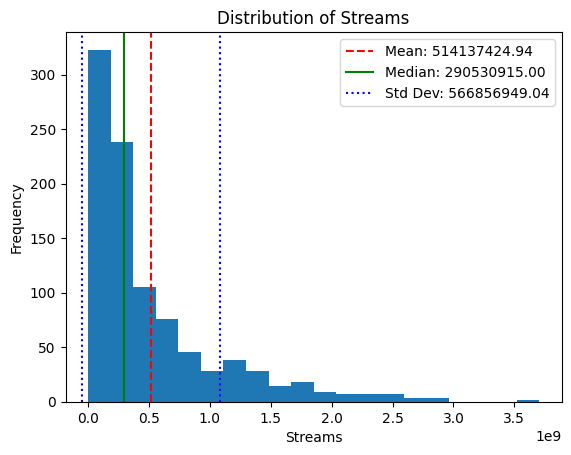

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/spotify-2023.csv', encoding='latin-1')

# Convert the 'streams' column to numeric, handling errors
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Calculate the mean, median, and standard deviation of the 'streams' column
streams_mean = df['streams'].mean()
streams_median = df['streams'].median()
streams_std = df['streams'].std()

# Create a histogram of the 'streams' column
plt.hist(df['streams'], bins=20)
plt.xlabel('Streams')
plt.ylabel('Frequency')
plt.title('Distribution of Streams')

# Add vertical lines for the mean, median, and standard deviation
plt.axvline(streams_mean, color='r', linestyle='--', label=f'Mean: {streams_mean:.2f}')
plt.axvline(streams_median, color='g', linestyle='-', label=f'Median: {streams_median:.2f}')
plt.axvline(streams_mean + streams_std, color='b', linestyle=':', label=f'Std Dev: {streams_std:.2f}')
plt.axvline(streams_mean - streams_std, color='b', linestyle=':')

plt.legend()
plt.show()

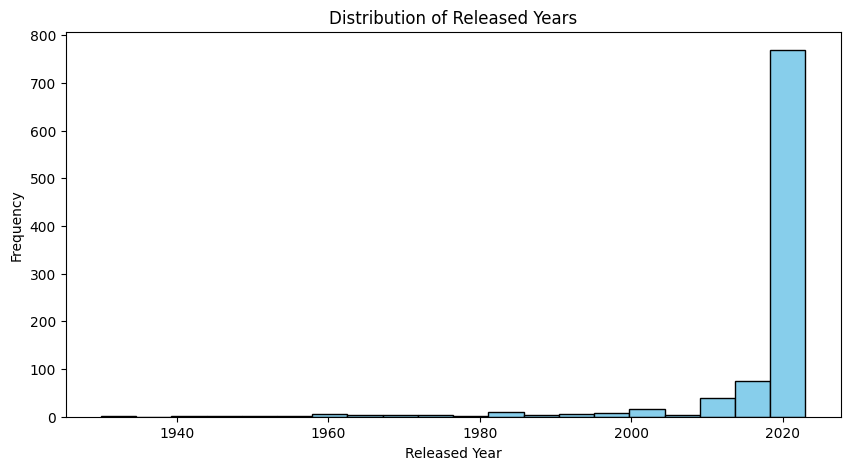

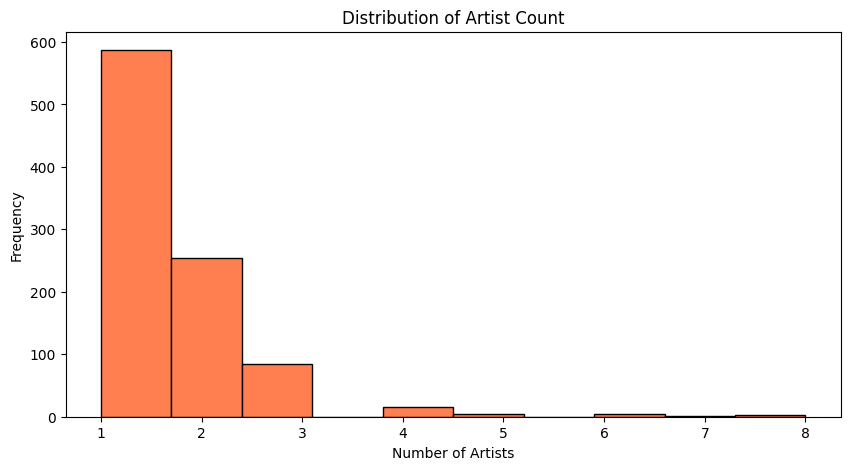

Descriptive statistics for Released Year:
count     953.000000
mean     2018.238195
std        11.116218
min      1930.000000
25%      2020.000000
50%      2022.000000
75%      2022.000000
max      2023.000000
Name: released_year, dtype: float64

Descriptive statistics for Artist Count:
count    953.000000
mean       1.555089
std        0.887209
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        8.000000
Name: artist_count, dtype: float64

Outliers for released year:
                                                                       track_name                                                          artist(s)_name  released_year
                                                                 I Wanna Be Yours                                                          Arctic Monkeys           2013
                                                                      Blank Space                                                            Taylor Sw

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/spotify-2023.csv', encoding='latin-1')

# --- Released Year Distribution ---
plt.figure(figsize=(10, 5))
plt.hist(df['released_year'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Released Year')
plt.ylabel('Frequency')
plt.title('Distribution of Released Years')
plt.show()

# --- Artist Count Distribution ---

# Assuming 'artist_count' is a column representing the number of artists per song
# If not, you'll need to create this column first

# Example: If 'artists' column contains a list of artists separated by commas
df['artist_count'] = df['artist(s)_name'].str.split(',').apply(len)

plt.figure(figsize=(10, 5))
plt.hist(df['artist_count'], bins=10, color='coral', edgecolor='black')
plt.xlabel('Number of Artists')
plt.ylabel('Frequency')
plt.title('Distribution of Artist Count')
plt.show()

# --- Trends and Outliers ---
print("Descriptive statistics for Released Year:")
print(df['released_year'].describe())

print("\nDescriptive statistics for Artist Count:")
print(df['artist_count'].describe())

# Outlier detection for released year (using IQR)
Q1 = df['released_year'].quantile(0.25)
Q3 = df['released_year'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['released_year'] < lower_bound) | (df['released_year'] > upper_bound)]

print(f"\nOutliers for released year:")
if not outliers.empty:
  print(outliers[['track_name', 'artist(s)_name', 'released_year']].to_string(index=False))
else:
  print("No outliers found for released year.")

# Outlier detection for artist count (using IQR)
Q1 = df['artist_count'].quantile(0.25)
Q3 = df['artist_count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['artist_count'] < lower_bound) | (df['artist_count'] > upper_bound)]

print(f"\nOutliers for artist count:")
if not outliers.empty:
  # Use tabulate to make the table neater
  !pip install tabulate
  from tabulate import tabulate
  print(tabulate(outliers[['track_name', 'artist(s)_name', 'artist_count']], headers='keys', tablefmt='psql'))
else:
  print("No outliers found for artist count.")

# Further analysis and visualization can be done based on these initial findings
# For example, you might want to create scatter plots, box plots, or investigate
# specific years or artist counts in more detail.

In [ ]:
import pandas as pd
from prettytable import PrettyTable

# Load the dataset
df = pd.read_csv('/content/spotify-2023.csv', encoding='latin-1')

# Convert the 'streams' column to numeric, handling errors
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Function to format stream count
def format_streams(streams):
  if streams >= 1e9:
    return f"{streams/1e9:.1f}B"
  elif streams >= 1e6:
    return f"{streams/1e6:.1f}M"
  else:
    return f"{streams:,.0f}"

# Apply the formatting to the streams column
df['formatted_streams'] = df['streams'].apply(format_streams)

# Sort the DataFrame by streams in descending order
df_sorted = df.sort_values(by='streams', ascending=False)

# Display the top 5 most streamed tracks with formatted streams
top_5_tracks = df_sorted[['track_name', 'artist(s)_name', 'formatted_streams']].head(5)

# Use prettytable to display the results in a formatted table

table = PrettyTable()
table.field_names = ["Track Name", "artist(s)_name", "Streams"]
for index, row in top_5_tracks.iterrows():
    table.add_row([row['track_name'], row['artist(s)_name'], row['formatted_streams']])

# Add some styling
table.align = "l"  # Left align text
table.hrules = 1  # Add horizontal lines between rows

print(table)

+-----------------------------------------------+-----------------------+---------+
| Track Name                                    | artist(s)_name        | Streams |
+-----------------------------------------------+-----------------------+---------+
| Blinding Lights                               | The Weeknd            | 3.7B    |
+-----------------------------------------------+-----------------------+---------+
| Shape of You                                  | Ed Sheeran            | 3.6B    |
+-----------------------------------------------+-----------------------+---------+
| Someone You Loved                             | Lewis Capaldi         | 2.9B    |
+-----------------------------------------------+-----------------------+---------+
| Dance Monkey                                  | Tones and I           | 2.9B    |
+-----------------------------------------------+-----------------------+---------+
| Sunflower - Spider-Man: Into the Spider-Verse | Post Malone, Swae Lee | 2.

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/spotify-2023.csv', encoding='latin-1')

# Calculate the frequency of each artist
artist_counts = df['artist(s)_name'].value_counts().head(5)

# Create a DataFrame from the results
top_5_artists = artist_counts.to_frame().reset_index()
top_5_artists.columns = ['artist(s)_name', 'Number of Tracks']

# Add a ranking column starting from 1
top_5_artists['Rank'] = range(1, len(top_5_artists) + 1)

# Reorder columns
top_5_artists = top_5_artists[['Rank', 'artist(s)_name', 'Number of Tracks']]

# Use tabulate to display the results in a formatted table
!pip install tabulate
from tabulate import tabulate
print(tabulate(top_5_artists, headers='keys', tablefmt='fancy_grid'))

╒════╤════════╤══════════════════╤════════════════════╕
│    │   Rank │ artist(s)_name   │   Number of Tracks │
╞════╪════════╪══════════════════╪════════════════════╡
│  0 │      1 │ Taylor Swift     │                 34 │
├────┼────────┼──────────────────┼────────────────────┤
│  1 │      2 │ The Weeknd       │                 22 │
├────┼────────┼──────────────────┼────────────────────┤
│  2 │      3 │ Bad Bunny        │                 19 │
├────┼────────┼──────────────────┼────────────────────┤
│  3 │      4 │ SZA              │                 19 │
├────┼────────┼──────────────────┼────────────────────┤
│  4 │      5 │ Harry Styles     │                 17 │
╘════╧════════╧══════════════════╧════════════════════╛


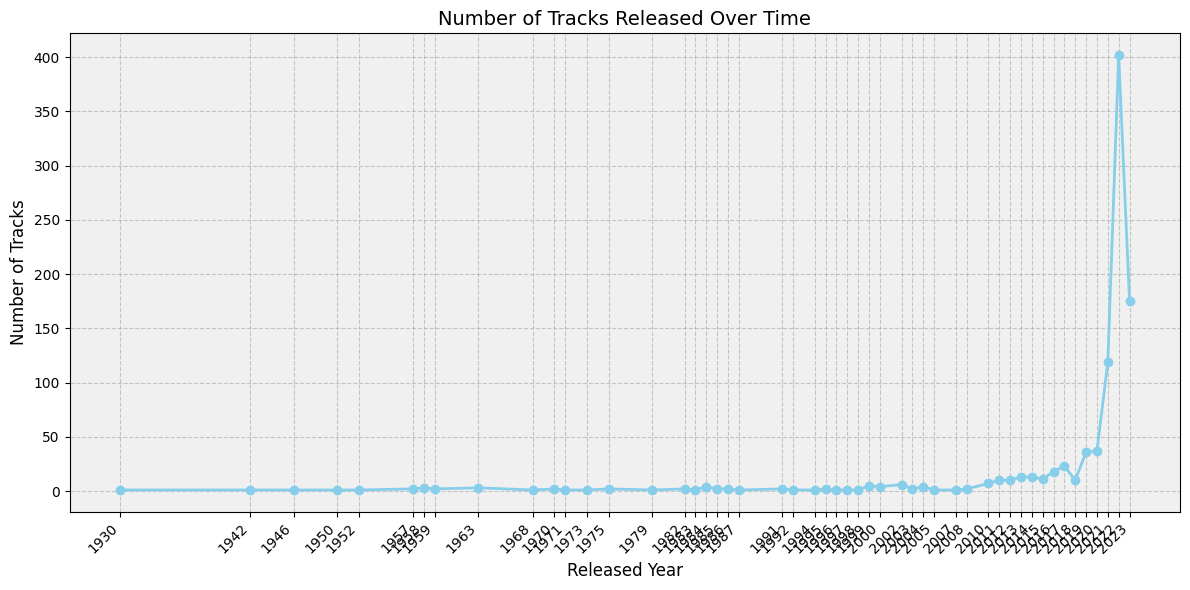

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/spotify-2023.csv', encoding='latin-1')

# Count the number of tracks released per year
tracks_per_year = df['released_year'].value_counts().sort_index()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(tracks_per_year.index, tracks_per_year.values, marker='o', linestyle='-', color='skyblue', linewidth=2)

# Customize plot appearance
plt.xlabel('Released Year', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)
plt.title('Number of Tracks Released Over Time', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(tracks_per_year.index, rotation=45, ha='right', fontsize=10)  # Show all years

# Add a background color
plt.gca().set_facecolor('#f0f0f0')

plt.tight_layout()
plt.show()

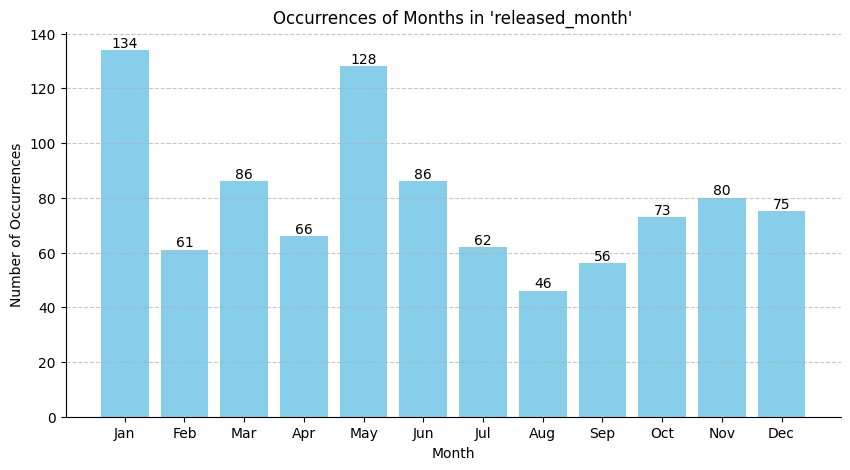

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/spotify-2023.csv', encoding='latin-1')

# Count occurrences of each month value in 'released_month'
month_counts = df['released_month'].value_counts().sort_index()

# Ensure all months from 1 to 12 are included
month_counts = month_counts.reindex(range(1, 13), fill_value=0)

# Create a bar graph with value labels
plt.figure(figsize=(10, 5))
bars = plt.bar(month_counts.index, month_counts.values, color='skyblue')

# Set x-axis labels to month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(1, 13), month_names)

# Add labels and title
plt.xlabel("Month")
plt.ylabel("Number of Occurrences")
plt.title("Occurrences of Months in 'released_month'")

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add value labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             str(int(height)), ha='center', va='bottom')

# Show the plot
plt.show()

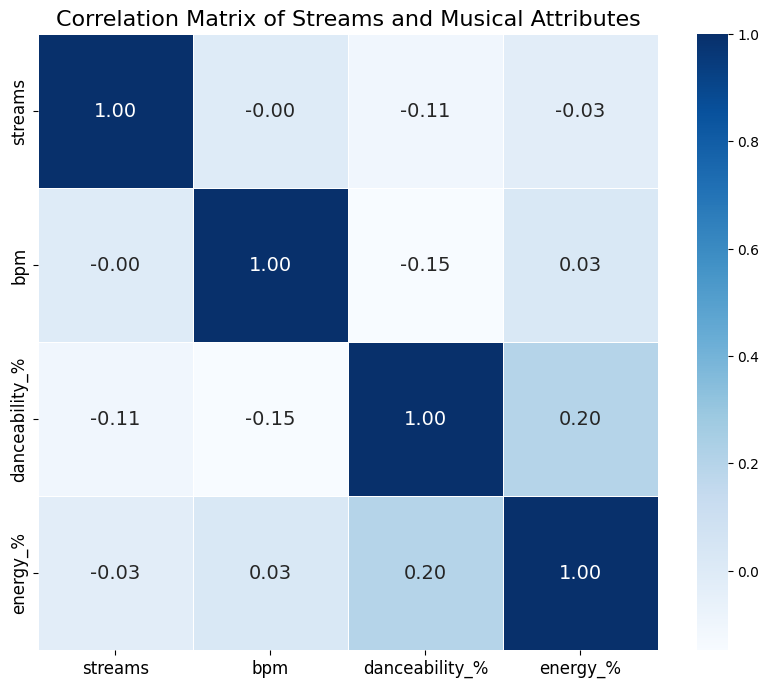


Attribute(s) with the strongest influence on streams:
danceability_%   -0.105457
Name: streams, dtype: float64


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/spotify-2023.csv', encoding='latin-1')

# Convert 'streams' column to numeric
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Select relevant columns for correlation analysis
attributes = ['bpm', 'danceability_%', 'energy_%']
df_corr = df[['streams'] + attributes].dropna()

# Calculate correlation matrix
corr_matrix = df_corr.corr()

# Create a heatmap with white and blue color scheme
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=.5, annot_kws={"size": 14})
plt.title('Correlation Matrix of Streams and Musical Attributes', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Identify attributes with highest correlation to streams
corr_with_streams = corr_matrix['streams'].drop('streams')
most_influential = corr_with_streams[abs(corr_with_streams) == abs(corr_with_streams).max()]

print("\nAttribute(s) with the strongest influence on streams:")
print(most_influential)

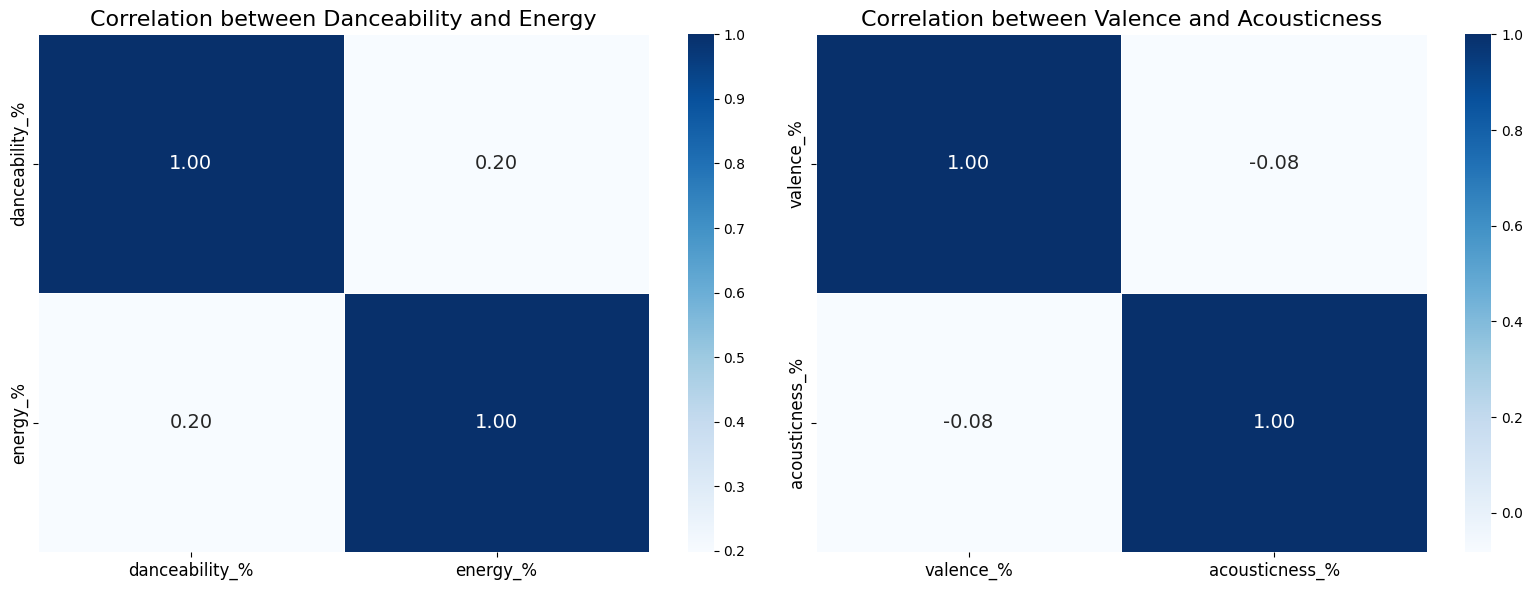


Correlation between danceability_% and energy_%: 0.20
Correlation between valence_% and acousticness_%: -0.08


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/spotify-2023.csv', encoding='latin-1')

# Select relevant columns for correlation analysis
attributes1 = ['danceability_%', 'energy_%']
attributes2 = ['valence_%', 'acousticness_%']

# Calculate correlation matrices
corr_matrix1 = df[attributes1].corr()
corr_matrix2 = df[attributes2].corr()

# Create heatmaps with improved design and white and blue color scheme
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(corr_matrix1, annot=True, cmap='Blues', fmt=".2f", linewidths=.5, annot_kws={"size": 14}, ax=axes[0]) # Changed color scheme to 'Blues'
axes[0].set_title('Correlation between Danceability and Energy', fontsize=16)
axes[0].tick_params(labelsize=12)

sns.heatmap(corr_matrix2, annot=True, cmap='Blues', fmt=".2f", linewidths=.5, annot_kws={"size": 14}, ax=axes[1]) # Changed color scheme to 'Blues'
axes[1].set_title('Correlation between Valence and Acousticness', fontsize=16)
axes[1].tick_params(labelsize=12)

plt.tight_layout()
plt.show()

# Print correlation values
print(f"\nCorrelation between danceability_% and energy_%: {corr_matrix1.iloc[0, 1]:.2f}")
print(f"Correlation between valence_% and acousticness_%: {corr_matrix2.iloc[0, 1]:.2f}")

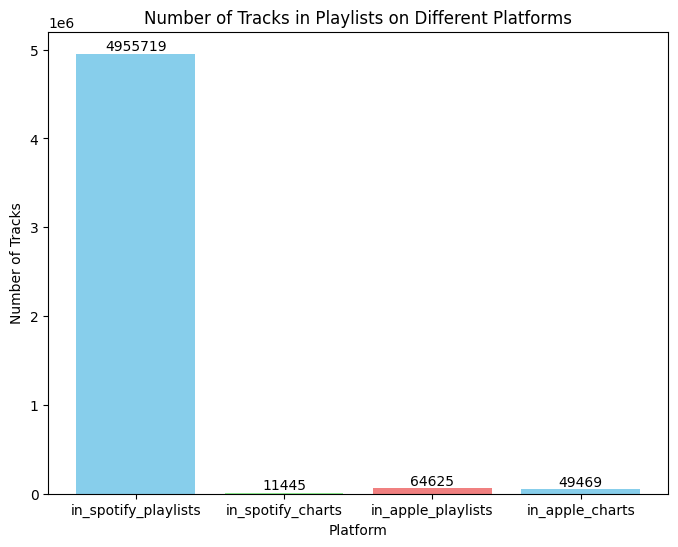


in_spotify_playlists seems to favor the most popular tracks.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/spotify-2023.csv', encoding='latin-1')

# Count tracks in each platform's playlists
platform_counts = df[['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists','in_apple_charts']].sum()

# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(platform_counts.index, platform_counts.values, color=['skyblue', 'lightgreen', 'lightcoral'])
plt.xlabel("Platform")
plt.ylabel("Number of Tracks")
plt.title("Number of Tracks in Playlists on Different Platforms")

# Add value labels above each bar
for i, v in enumerate(platform_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

# Identify the platform with the most popular tracks
most_popular_platform = platform_counts.idxmax()
print(f"\n{most_popular_platform} seems to favor the most popular tracks.")

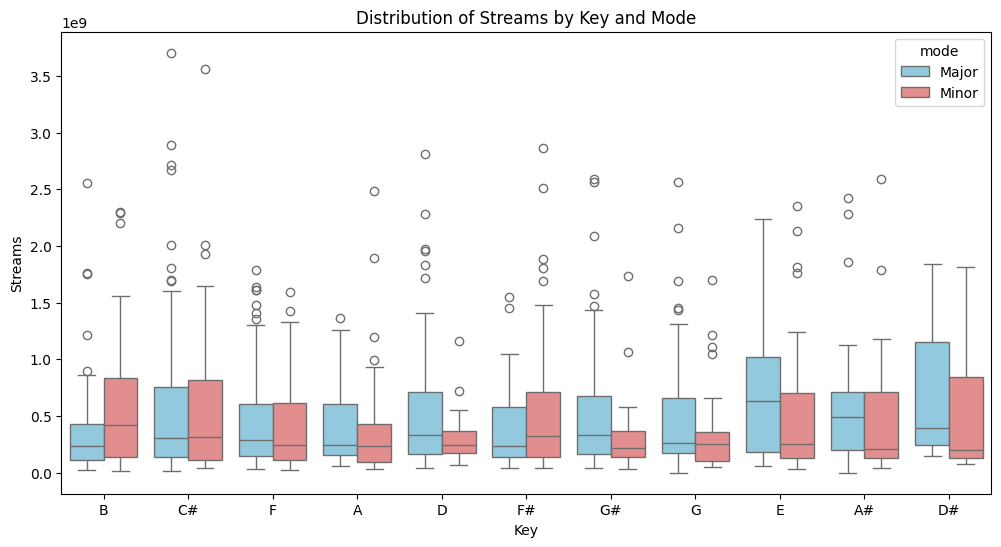


Average streams for tracks in Major key: 534832793.34
Average streams for tracks in Minor key: 485944478.91


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/spotify-2023.csv', encoding='latin-1')

# Convert 'streams' column to numeric
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Group data by key and mode and calculate average streams
key_mode_streams = df.groupby(['key', 'mode'])['streams'].mean().reset_index()

# Create a box plot for streams by key
plt.figure(figsize=(12, 6))
sns.boxplot(x='key', y='streams', data=df, hue='mode', palette={'Major': 'skyblue', 'Minor': 'lightcoral'})
plt.title('Distribution of Streams by Key and Mode')
plt.xlabel('Key')
plt.ylabel('Streams')
plt.show()

# Calculate average streams for major and minor keys
major_streams = df[df['mode'] == 'Major']['streams'].mean()
minor_streams = df[df['mode'] == 'Minor']['streams'].mean()

print(f"\nAverage streams for tracks in Major key: {major_streams:.2f}")
print(f"Average streams for tracks in Minor key: {minor_streams:.2f}")

# Further analysis could involve:
# - Comparing streams across different keys within major or minor modes
# - Investigating the relationship between key, mode, and other attributes like danceability or energy
# - Analyzing trends over time for different keys and modes

Most frequently appearing artists in playlists and charts:

The Weeknd: 147258
Taylor Swift: 137178
Ed Sheeran: 130788
Harry Styles: 112497
Kendrick Lamar: 59772
Bad Bunny: 53026
SZA: 46399
BTS: 19409
Feid: 14956
Morgan Wallen: 9706


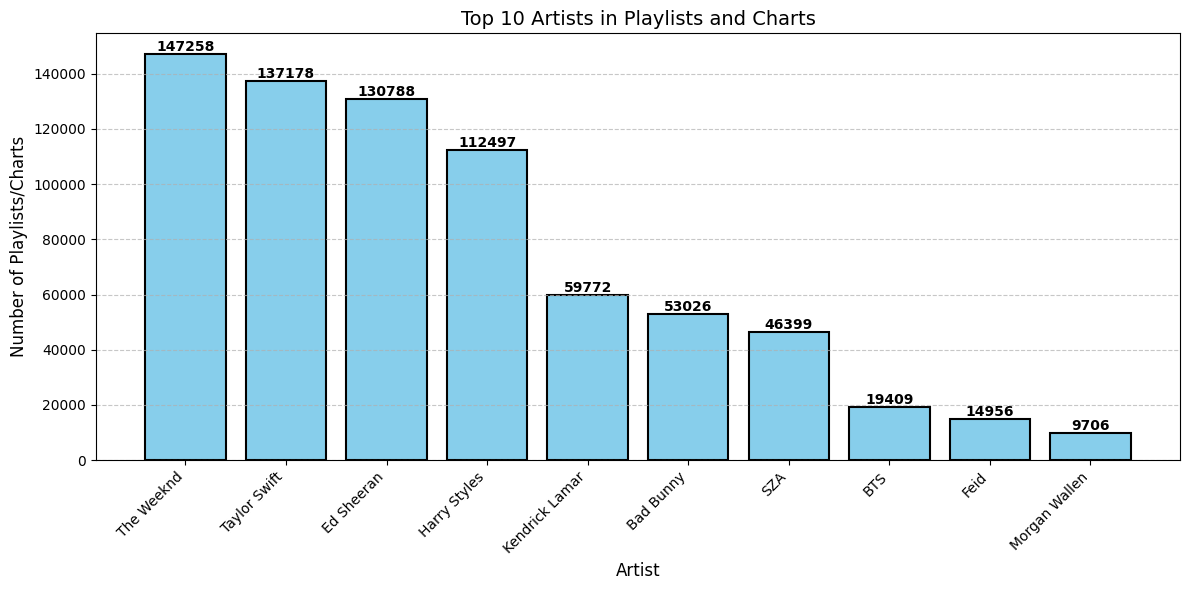

In [ ]:
import pandas as pd
from collections import Counter

# Load the dataset
df = pd.read_csv('/content/spotify-2023.csv', encoding='latin-1')

# Combine playlist and chart columns for overall presence
df['all_playlists'] = df['in_spotify_playlists'] + df['in_spotify_charts'] + df['in_apple_playlists'] + df['in_apple_charts']

# Get top 10 artists overall
top_10_artists = df['artist(s)_name'].value_counts().head(10).index

# Filter dataframe for top 10 artists
df_top_artists = df[df['artist(s)_name'].isin(top_10_artists)]

# Count playlist occurrences for each artist
playlist_counts = df_top_artists.groupby('artist(s)_name')['all_playlists'].sum().sort_values(ascending=False)

# Print the results
print("Most frequently appearing artists in playlists and charts:\n")
for artist, count in playlist_counts.items():
    print(f"{artist}: {count}")

# Create a bar chart with enhanced design
plt.figure(figsize=(12, 6))
bars = plt.bar(playlist_counts.index, playlist_counts.values, color='skyblue', edgecolor='black', linewidth=1.5)
plt.xlabel("Artist", fontsize=12)
plt.ylabel("Number of Playlists/Charts", fontsize=12)
plt.title("Top 10 Artists in Playlists and Charts", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)),
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

1. Overview of Dataset
• How many rows and columns does the dataset contain?
- the number of rows is 953 and for columns 24
• What are the data types of each column? Are there any missing values?
-in_shazam_charts 50, key 95

2. Basic Descriptive Statistics
• What are the mean, median, and standard deviation of the streams column?
-mean	= 514,137,424.939076
-median = 290,530,915.000000
-standard deviation= 	566,856,949.038883
• What is the distribution of released_year and artist_count? Are there any noticeable trends or outliers?
-

3. Top Performers
• Which track has the highest number of streams? Display the top 5 most streamed tracks.
- see the table
• Who are the top 5 most frequent artists based on the number of tracks in the dataset?
- see the table

4. Temporal Trends
• Analyze the trends in the number of tracks released over time. Plot the number of tracks released per year.
-see the graph
• Does the number of tracks released per month follow any noticeable patterns?
-Based on the provided bar chart, there are a few noticeable patterns in the distribution of track releases across different months: Peak Releases in Early Years, Consistent Releases Throughout the Year, Slight Decrease in Late Months
Which month sees the most releases?
-the distribution of released months is fairly balanced, with a slight bias towards the early months of the year and the month that has the most releases is January followed by May

5. Genre and Music Characteristics
• Examine the correlation between streams and musical attributes like bpm, danceability_%, and energy_%. Which attributes seem to influence streams the most?
-
• Is there a correlation between danceability_% and energy_%? How about valence_% and acousticness_%?
-

6. Platform Popularity
• How do the numbers of tracks in spotify_playlists, spotify_charts, and apple_playlistscompare? Which platform seems to favor the most popular tracks?
- we compare it by using bar graphs and it shows that the popular tracks was played on spotify platform

7. Advanced Analysis
• Based on the streams data, can you identify any patterns among tracks with the same key or mode (Major vs. Minor)?
-
• Do certain genres or artists consistently appear in more playlists or charts? Perform an analysis to compare the most frequently appearing artists in playlists or charts.
-Most frequently appearing artists in playlists and charts:

The Weeknd: 147258
Taylor Swift: 137178
Ed Sheeran: 130788
Harry Styles: 112497
Kendrick Lamar: 59772
Bad Bunny: 53026
SZA: 46399
BTS: 19409
Feid: 14956
Morgan Wallen: 9706

